In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, auc
from sklearn.svm import SVC
from sklearn.calibration import CalibratedClassifierCV

In [19]:
test = pd.read_csv('test_data_44k.csv')
y_pred_naivebayes = pd.read_csv('y_pred_probs_tf-idf-NaiveBayes.csv')
y_pred_tfidfsvm = pd.read_csv('y_pred_proba_tf-idfsvm.csv')
y_pred_bert = pd.read_csv('probs_bert.csv')
y_pred_embedding = pd.read_csv('y_pred_proba_embedding.csv')
y_pred_naivebayes=y_pred_naivebayes["1"]
y_pred_tfidfsvm=y_pred_tfidfsvm["1"]
y_pred_bert=y_pred_bert["1"]
y_pred_embedding=y_pred_embedding.values

In [18]:
y_pred_bert

,Unnamed: 0,0
0,0,1
1,1,0
2,2,0
3,3,1
4,4,0
...,...,...
43995,43995,0
43996,43996,1
43997,43997,1
43998,43998,0


In [10]:
y_pred_bert

0        0.000515
1        0.998545
2        0.014242
3        0.998365
4        0.998130
           ...   
39995    0.001370
39996    0.004225
39997    0.996653
39998    0.002783
39999    0.998333
Name: 1, Length: 40000, dtype: float64

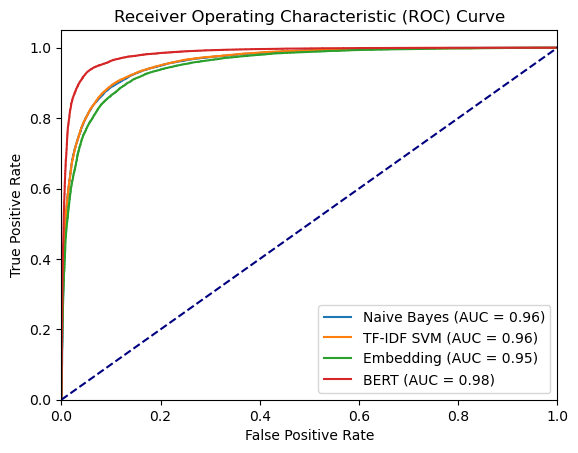

In [21]:
# Extract the true labels from the test data
y_true = test['labels'].values

# Calculate the False Positive Rate (FPR) and True Positive Rate (TPR) for each model
fpr_naivebayes, tpr_naivebayes, _ = roc_curve(y_true, y_pred_naivebayes)
fpr_tfidfsvm, tpr_tfidfsvm, _ = roc_curve(y_true, y_pred_tfidfsvm)
fpr_bert_binary, tpr_bert_binary, _ = roc_curve(y_true, y_pred_bert)
fpr_embedding, tpr_embedding, _ = roc_curve(y_true, y_pred_embedding)

# Calculate the Area Under the ROC Curve (AUC) for each model
auc_naivebayes = auc(fpr_naivebayes, tpr_naivebayes)
auc_tfidfsvm = auc(fpr_tfidfsvm, tpr_tfidfsvm)
auc_bert_binary = auc(fpr_bert_binary, tpr_bert_binary)
auc_embedding = auc(fpr_embedding, tpr_embedding)
# Plot the ROC curves for each model
plt.plot(fpr_naivebayes, tpr_naivebayes, label='Naive Bayes (AUC = {:.2f})'.format(auc_naivebayes))
plt.plot(fpr_tfidfsvm, tpr_tfidfsvm, label='TF-IDF SVM (AUC = {:.2f})'.format(auc_tfidfsvm))
plt.plot(fpr_embedding, tpr_embedding, label='Embedding (AUC = {:.2f})'.format(auc_embedding))
plt.plot(fpr_bert_binary, tpr_bert_binary, label='BERT (AUC = {:.2f})'.format(auc_bert_binary))

# Customize the plot
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')  # Add diagonal line for reference
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')

# Display the plot
plt.show()

In [6]:
y_pred_binary_tfidf = pd.read_csv("y_pred_tf-idfsvm.csv")
y_pred_binary_embedding = pd.read_csv("y_pred_embeddings.csv")
y_pred_binary_bert = pd.read_csv("bert_binary_preds.csv")
y_pred_binary_naivebayes = pd.read_csv("y_pred_tf-idf-NaiveBayes.csv")

In [24]:
test["y_pred_binary_tfidf"] = y_pred_binary_tfidf["0"]
test["y_pred_binary_embedding"] = y_pred_binary_embedding["0"]
test["y_pred_binary_bert"] = y_pred_binary_bert["0"]
test["y_pred_binary_naivebayes"] = y_pred_binary_naivebayes["0"]

In [25]:
pd.set_option('display.max_colwidth', None)
# test[test["labels"] != test["y_pred"]].sample(5)
indices = [27443, 29215, 14827 ,18809 ,12847]
test[test.index.isin(indices)]

,sentences,labels,y_pred_binary_tfidf,y_pred_binary_embedding,y_pred_binary_bert,y_pred_binary_naivebayes
12847,"a good book: this book really hit the mark with the right balance of theory and practical application. i've waded through more than a few technical books on tube radio theory and restoration, and this one, though not as detailed as a textbook, is clearly the place to start.however, the section on troubleshooting was extremely limited. experience indicates that after following the steps recommended in the book between 10 and 20 percent of restored radios will still have some type of problem. most individuals learning the process for repairing tube radios will be seeking practical guidance for identifying possible sources of these problems and their potential solutions. maybe troubleshooting will be the subject of mr. mcwhorter's next book.",1,0,0,1,1
14827,"here is just a sample!! check it out!!: i love this album and pray that someone contacts me so that i can get a copy of the cd or even tape! amazon...please get this so that all of us who would like a copy can get it! until then...here is ""feel like going on"" the song![...]",1,0,1,1,1
18809,"still in the box: i don't really know how the product is. after reading more detailed information included with the product, it says not recommended for the pool because the clorine could effect/shorten the product life. it seems that the ad shows the coolaroo shade being used next to the pool. and that's what we bought it for. not sure what to do with them now - still siting in the box next to the door gathering dust.... oh, well. i'm sure its a great product, just not for us.",0,1,1,0,0
27443,"leaves the readers hungry for more.: it's weird really how i got so into this book. one of my friends who just so happened read the book was begging me to read it. now, don't get me wrong i love fantasy stories especially ones that are about these blood suckers but after hearing my friend's summary of it i don't know i just felt uninterested.pffft...boy was i glad my friend's the persisting type. she practically lunged the book at me. so as to not annoy her more, i read her copy of the book and i found myself entralled by it. i could not stop reading it!after finishing it i felt saddened that it was finished. i wanted more! i wanted to know what happened next.i gave the book back to my friend and straight away got myself a copy of twilight. it's really that good. i love it.trust me no matter how 'off' the summary might seem like you would not feel dissatisfied by its contents.",1,0,0,0,0
29215,"emotionally-distant author: for a memoir, the author is very removed from the experiences she writes about. she conveys little if any emotion about what must have been a very lonely and often frightening existance (especially given her age) in a strange land with a mad and eventually abusive husband, a young child who was often extremely sick and with the responsibilites of running a hacienda. although her writing is beautiful at times, the author never really connected with me.",0,1,1,0,1


Text(0.5, 1.0, 'Naive Bayes')

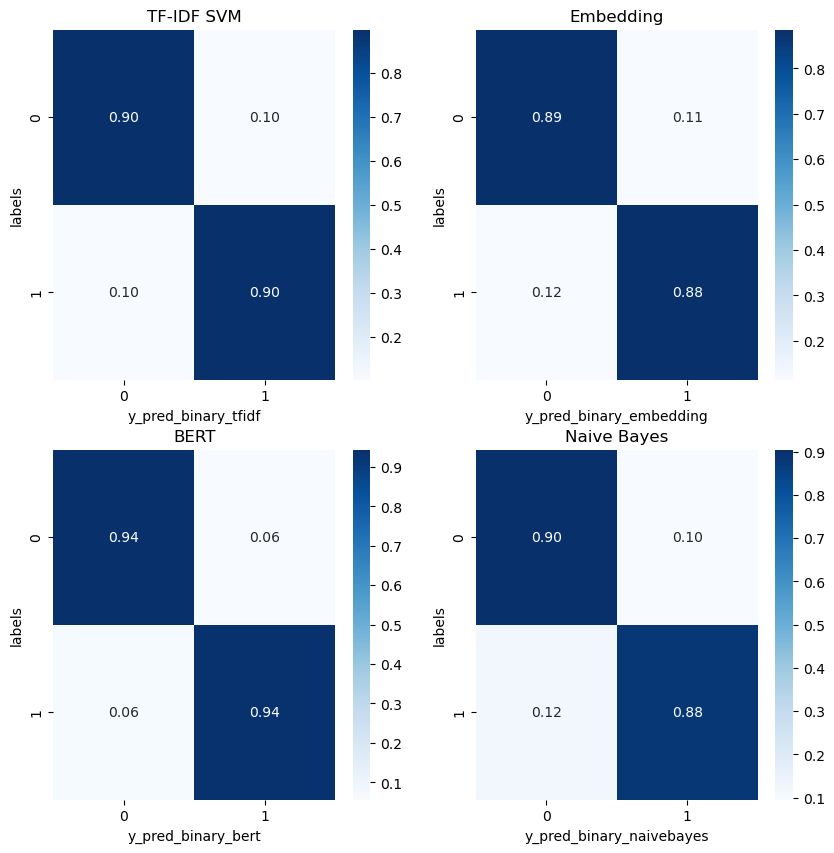

In [26]:
# Subplot all the confusion matrices
fig, axes = plt.subplots(2, 2, figsize=(10, 10))
sns.heatmap(pd.crosstab(test['labels'], test['y_pred_binary_tfidf'], normalize='index'), annot=True, fmt='.2f', cmap='Blues', ax=axes[0, 0]).set_title('TF-IDF SVM')
sns.heatmap(pd.crosstab(test['labels'], test['y_pred_binary_embedding'], normalize='index'), annot=True, fmt='.2f', cmap='Blues', ax=axes[0, 1]).set_title('Embedding')
sns.heatmap(pd.crosstab(test['labels'], test['y_pred_binary_bert'], normalize='index'), annot=True, fmt='.2f', cmap='Blues', ax=axes[1, 0]).set_title('BERT')
sns.heatmap(pd.crosstab(test['labels'], test['y_pred_binary_naivebayes'], normalize='index'), annot=True, fmt='.2f', cmap='Blues', ax=axes[1, 1]).set_title('Naive Bayes')
